In [75]:
from matplotlib.axes import Axes
from matplotlib.figure import Figure
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.pyplot import subplots
from pandas import DataFrame, read_csv

In [76]:
all_write_data: DataFrame = read_csv('data/all_write.csv')
all_write_data_1k: DataFrame = all_write_data[all_write_data['data_size'] == 1000]
all_write_data_1k

,system,server_count,data_size,read_ratio,num_clients,num_dbs,wal_file_count,ops,med,p95,p99
0,etcd,3,1000,0.0,33,NaN,NaN,6474,10439,33738,48209
3,etcdl,3,1000,0.0,33,1.0,1.0,53045,1663,2211,2474
6,etcdl,3,1000,0.0,33,1.0,5.0,45814,1946,2588,2841
9,etcdl,3,1000,0.0,33,1.0,10.0,40853,2190,2882,3153
12,etcdl,3,1000,0.0,33,3.0,1.0,49659,1783,2380,2640
15,etcdl,3,1000,0.0,33,3.0,5.0,43313,2063,2724,3000
18,etcdl,3,1000,0.0,33,3.0,10.0,38665,2309,3040,3320
21,etcdl,3,1000,0.0,33,5.0,1.0,46713,1910,2521,2780
24,etcdl,3,1000,0.0,33,5.0,5.0,41224,2168,2856,3152
27,etcdl,3,1000,0.0,33,5.0,10.0,37267,2401,3164,3475


['etcd', 'etcd-light(1, 1)', 'etcd-light(5, 1)', 'etcd-light(10, 1)', 'etcd-light(1, 3)', 'etcd-light(5, 3)', 'etcd-light(10, 3)', 'etcd-light(1, 5)', 'etcd-light(5, 5)', 'etcd-light(10, 5)']
[51.792, 424.36, 366.512, 326.824, 397.272, 346.504, 309.32, 373.704, 329.792, 298.136]


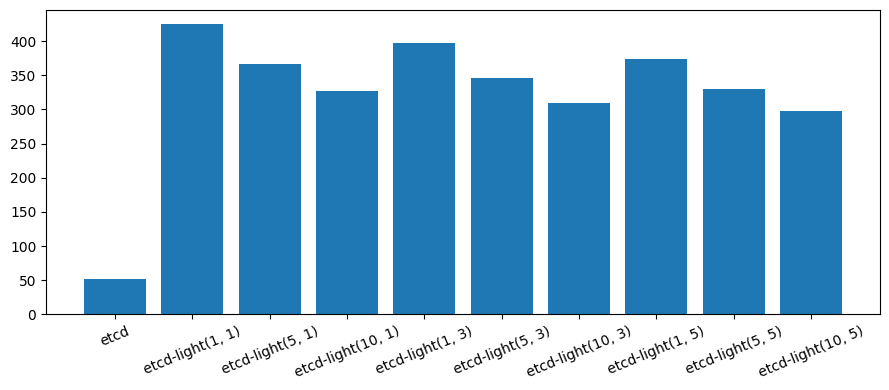

In [77]:
fig: Figure
ax: Axes
fig, ax = subplots(figsize=(9, 4))

labels: list[str] = []
vals: list[float] = []
for i, row in all_write_data_1k.iterrows():
  match row['system']:
    case 'etcd':
      labels.append('etcd')
    case 'etcdl':
      labels.append(f'etcd-light({int(row["wal_file_count"])}, {int(row["num_dbs"])})')
  
  vals.append((1000 * row['ops'] * 8) / (1000000))

print(labels)
print(vals)

ax.bar(labels, vals, color='C0')
ax.tick_params(axis='x', labelrotation=22.5)
fig.tight_layout()

fig.savefig('plots/all_write_throughput.png')
fig.savefig('plots/all_write_throughput.pdf')

['etcd', 'etcd-light(1, 1)', 'etcd-light(5, 1)', 'etcd-light(10, 1)', 'etcd-light(1, 3)', 'etcd-light(5, 3)', 'etcd-light(10, 3)', 'etcd-light(1, 5)', 'etcd-light(5, 5)', 'etcd-light(10, 5)']
[10439, 1663, 1946, 2190, 1783, 2063, 2309, 1910, 2168, 2401]
[33738, 2211, 2588, 2882, 2380, 2724, 3040, 2521, 2856, 3164]
[48209, 2474, 2841, 3153, 2640, 3000, 3320, 2780, 3152, 3475]


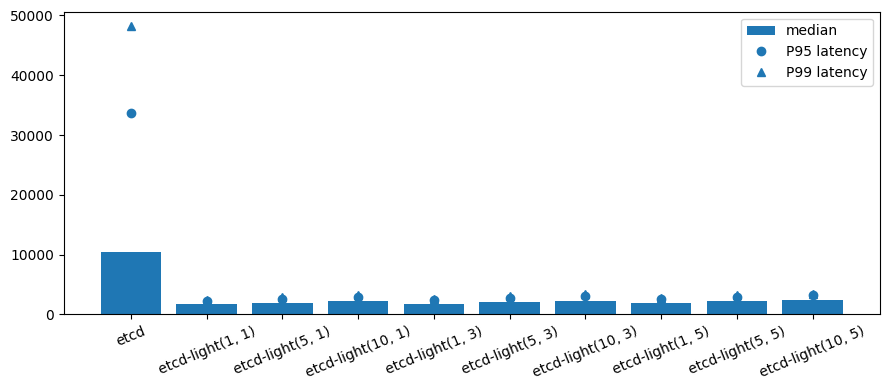

In [78]:
fig: Figure
ax: Axes
fig, ax = subplots(figsize=(9, 4))

labels: list[str] = []
vals: list[int] = []
tail95: list[int] = []
tail99: list[int] = []
for i, row in all_write_data_1k.iterrows():
  match row['system']:
    case 'etcd':
      labels.append('etcd')
    case 'etcdl':
      labels.append(f'etcd-light({int(row["wal_file_count"])}, {int(row["num_dbs"])})')
  
  vals.append(row['med'])
  tail95.append(row['p95'])
  tail99.append(row['p99'])

print(labels)
print(vals)
print(tail95)
print(tail99)

ax.bar(labels, vals, color='C0')
ax.plot(labels, tail95, color='C0', linestyle='', marker='o')
ax.plot(labels, tail99, color='C0', linestyle='', marker='^')

ax.tick_params(axis='x', labelrotation=22.5)
fig.tight_layout()

ax.legend(
  handles=[
    Patch(facecolor='C0', label='median'),
    Line2D([0], [0], marker='o', color='C0', linestyle='None', label='P95 latency'),
    Line2D([0], [0], marker='^', color='C0', linestyle='None', label='P99 latency')
  ],
  loc='upper right')

fig.savefig('plots/all_write_latency.png')
fig.savefig('plots/all_write_latency.pdf')